<a href="https://colab.research.google.com/github/riyabharath24/Cancer-Cell-Detection/blob/main/Cancer_Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CANCER CELL DETECTION**

Detection of whether tumour is benign or malignant using a dataset of tumour cell shapes and sizes

### IMPORTING THE REQUIRED LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [ ]:
# Displaying the Dataset using the Pandas Library

df = pd.read_csv('cancer_cell_dataset.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
print("Data types of features are:\n{}".format(df.dtypes))

Data types of features are:
ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object


### PREPROCESSING

Converting all non- numerical values to numerical values

In [ ]:
df = df[pd.to_numeric(df['BareNuc'], errors="coerce").notnull()]

df['BareNuc'] = df['BareNuc'].astype('int64')
print(df.dtypes)

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object


<ipython-input-5-b9ba414200c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc'] = df['BareNuc'].astype('int64')


### EXPLORATORY DATA ANALYSIS

In [ ]:
# Displaying the classes using a bar chart

count = df['Class'].value_counts()
count

2    444
4    239
Name: Class, dtype: int64

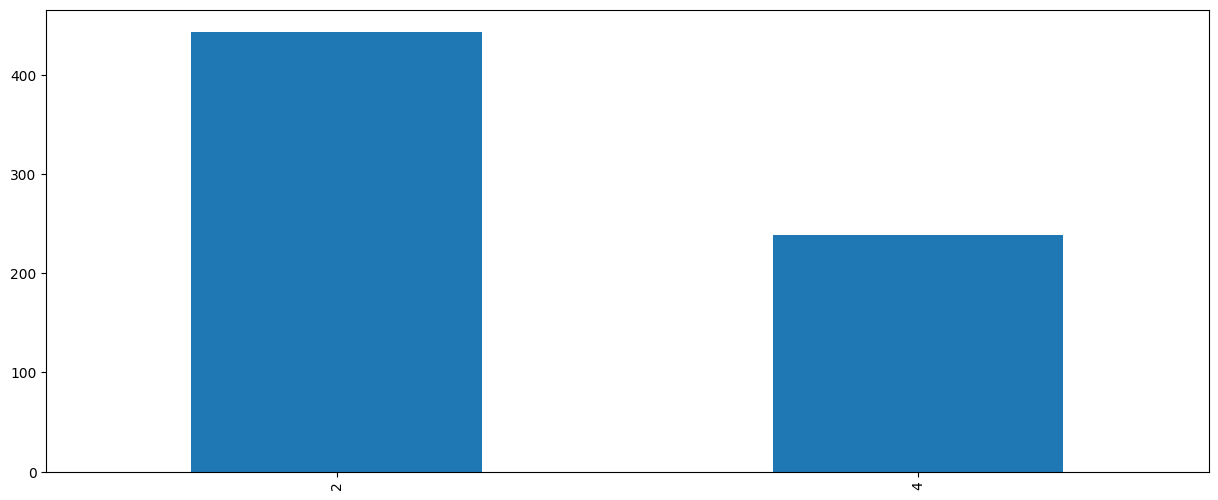

In [ ]:
count.plot(kind='bar', figsize=(15,6))
plt.show()

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Clump'}>,
        <Axes: title={'center': 'UnifSize'}>],
       [<Axes: title={'center': 'UnifShape'}>,
        <Axes: title={'center': 'MargAdh'}>,
        <Axes: title={'center': 'SingEpiSize'}>],
       [<Axes: title={'center': 'BareNuc'}>,
        <Axes: title={'center': 'BlandChrom'}>,
        <Axes: title={'center': 'NormNucl'}>],
       [<Axes: title={'center': 'Mit'}>,
        <Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

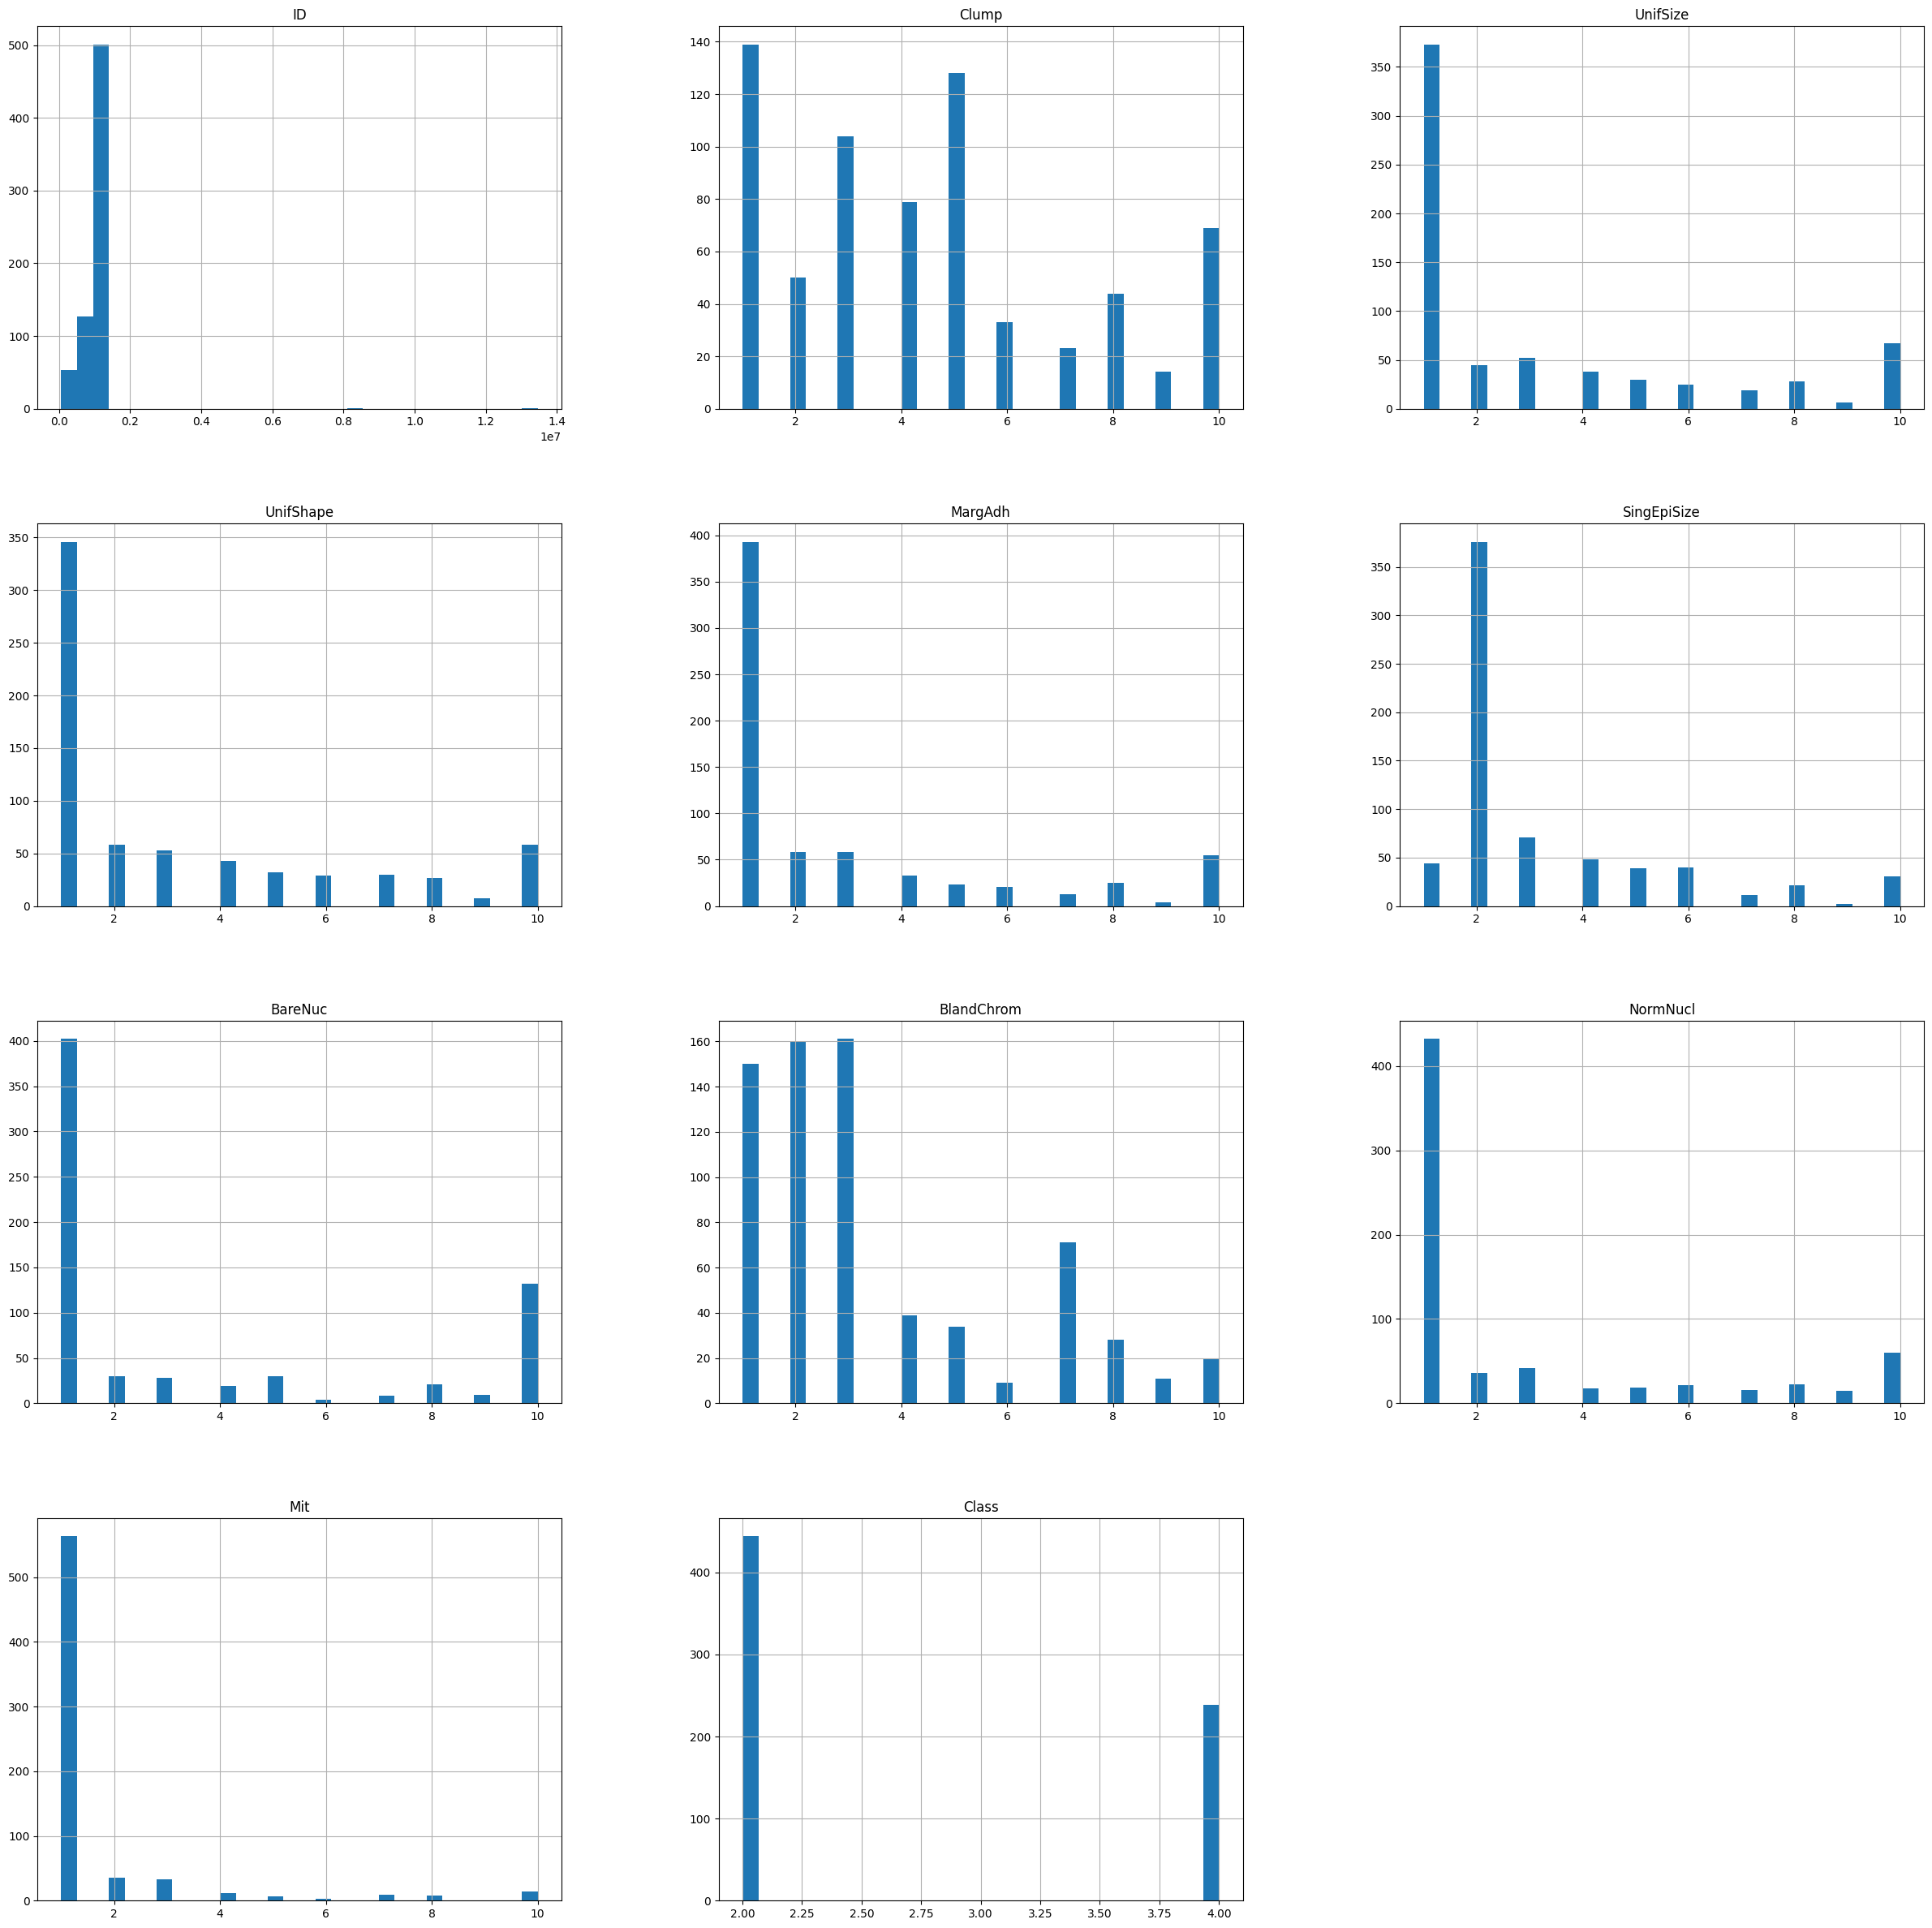

In [ ]:
df.hist(bins=30, figsize=(30, 30))

<Axes: >

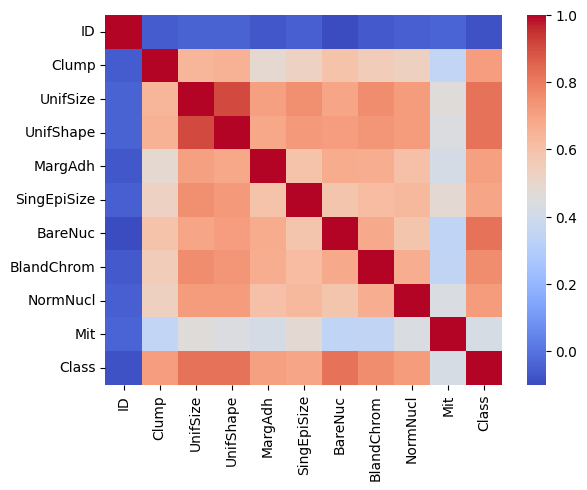

In [ ]:
# Correlation Data Heatmap

import seaborn as sns

sns.heatmap(df.corr(),cmap = 'coolwarm',cbar = True)

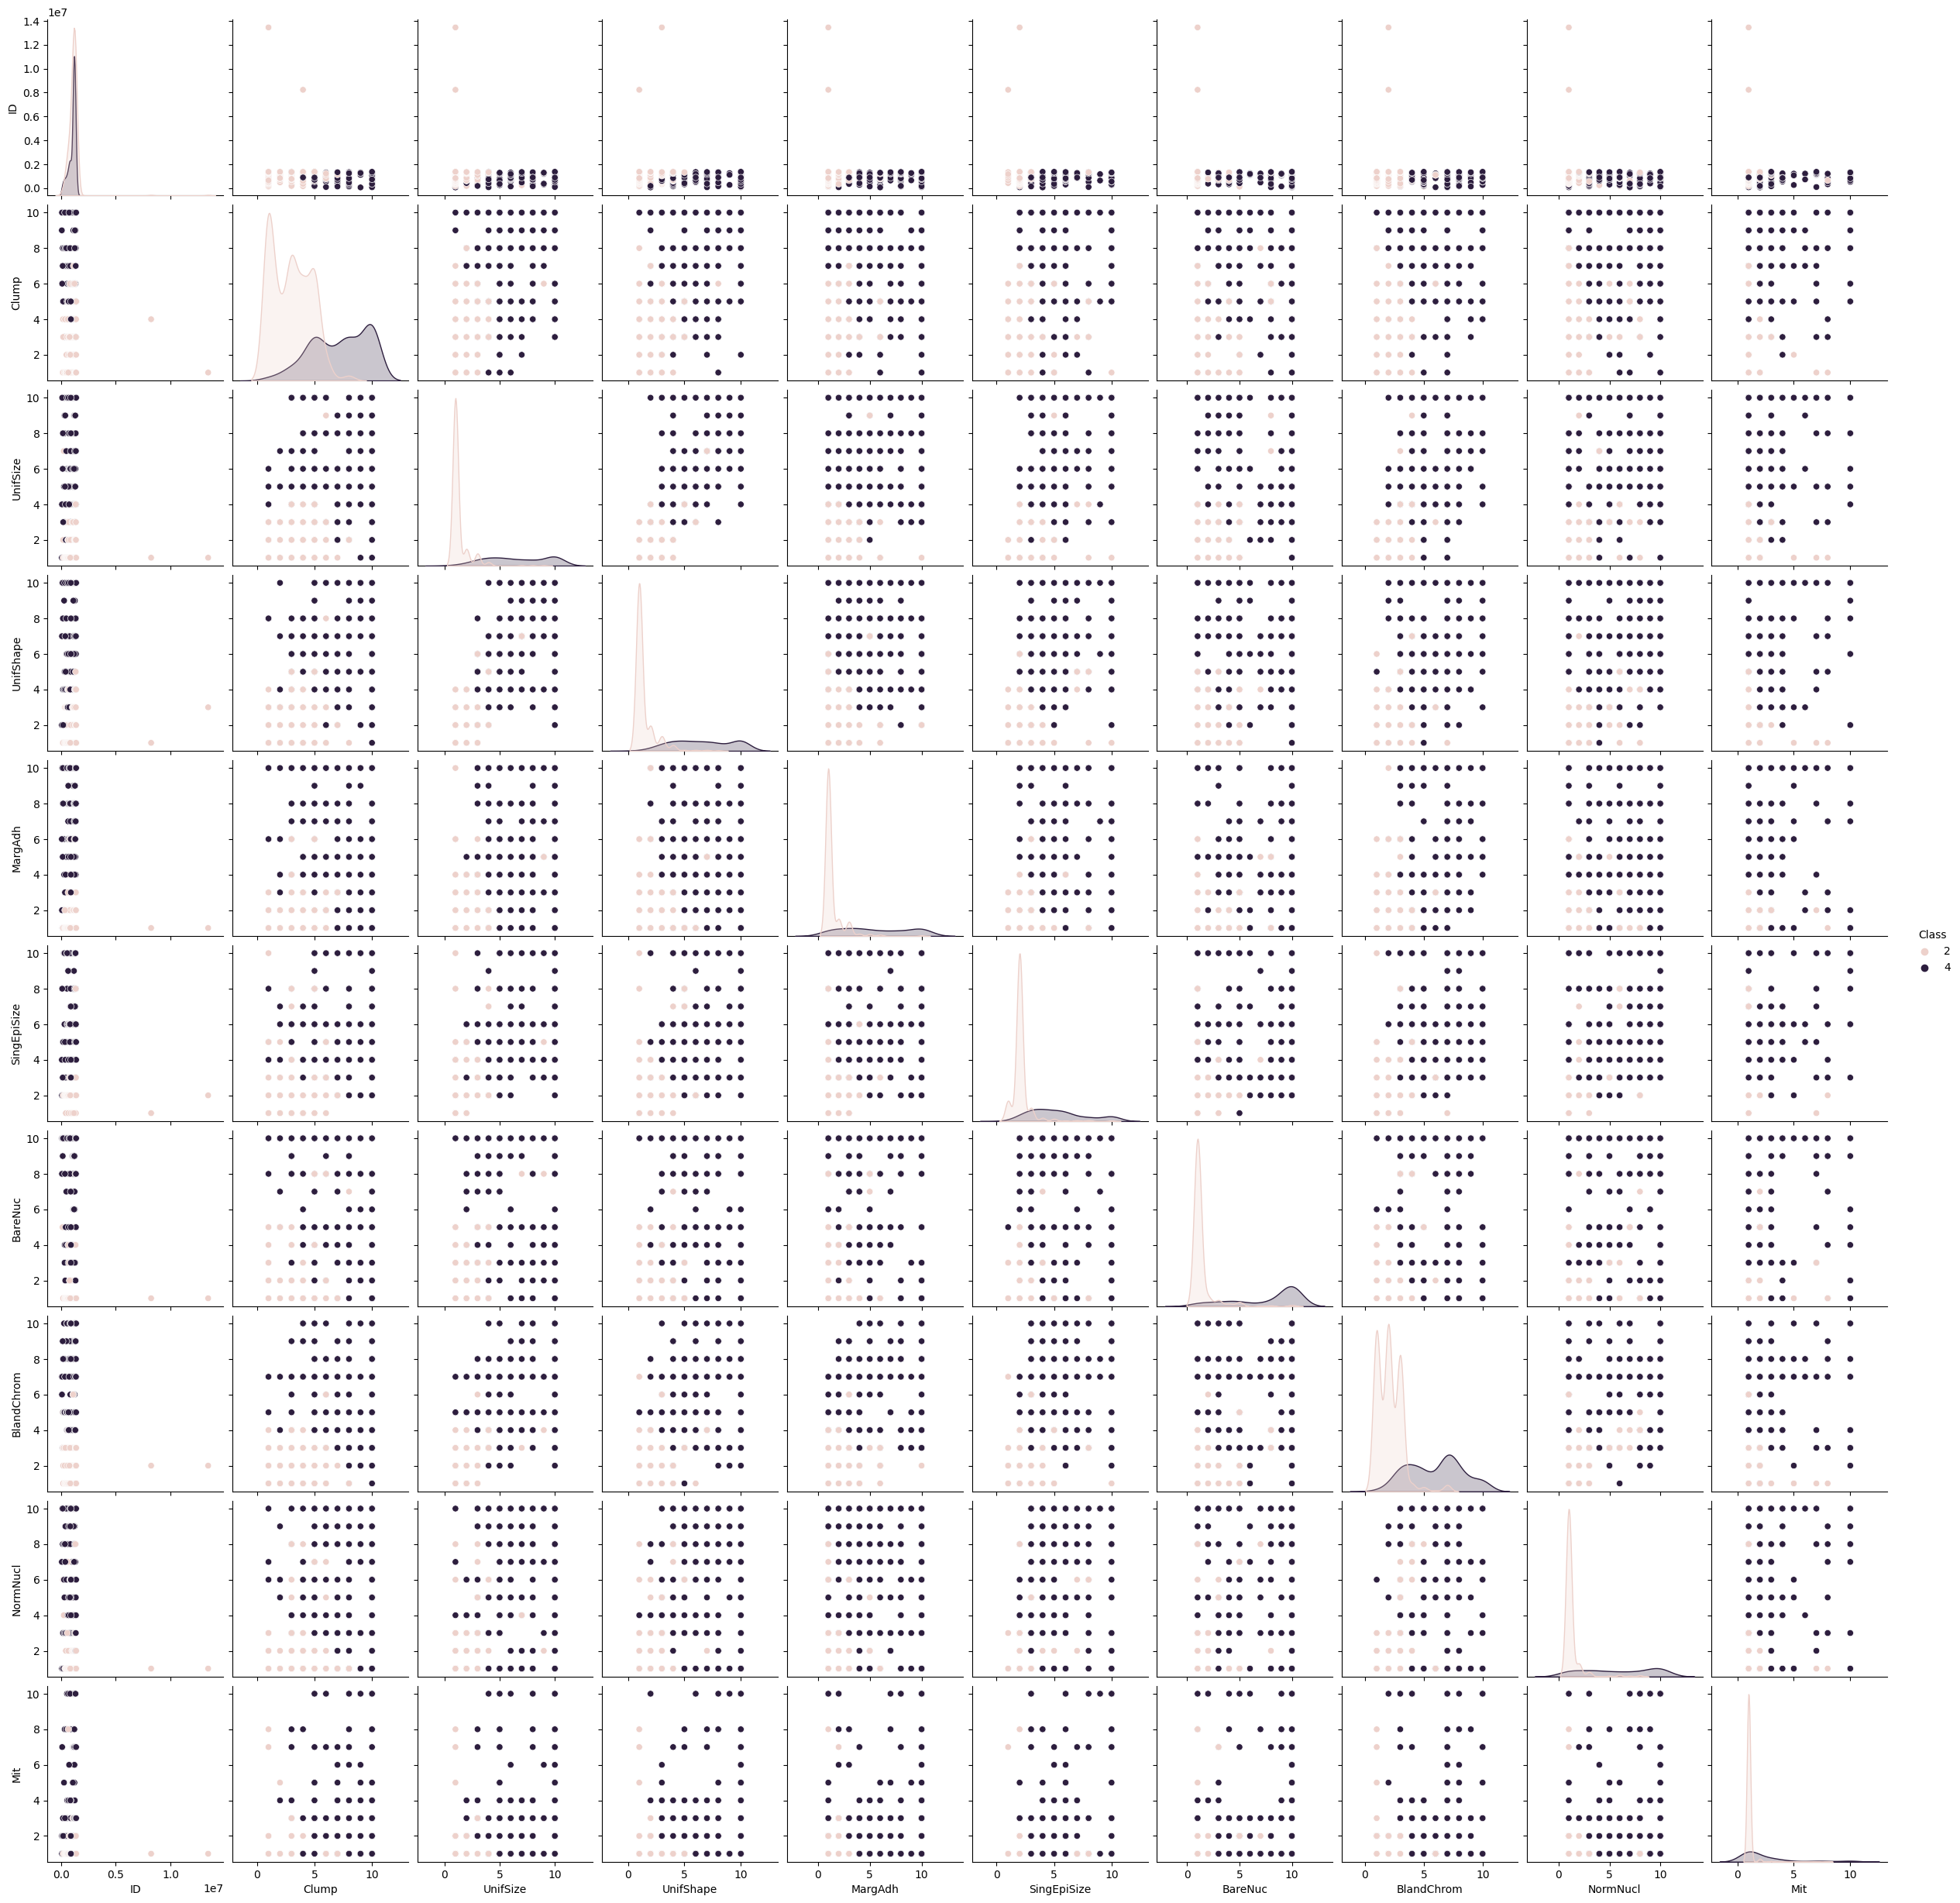

In [ ]:
#visualize the whole dataset
sns.pairplot(df, hue="Class")

### SPLITTING DATA INTO TRAINING AND TESTING DATA

In [ ]:
# Class Labels include Benign=2 and Malignant=4

X = np.asanyarray(df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
y = np.asanyarray(df['Class'].astype('int'))


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training set: {}\nTest set: {}".format((X_train.shape, y_train.shape), (X_test.shape, y_test.shape)))

Training set: ((546, 9), (546,))
Test set: ((137, 9), (137,))


### CREATING THE MODEL 

In [ ]:
#Using Support Vector Machine(SVM) Algorithm

from sklearn.svm import SVC

model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)
y_pred = model_rbf.predict(X_test)

In [ ]:
#displaying the predictions
print("True Labels: {}\nPredicted Labels:{}".format(y_test[3:12], y_pred[3:12]))

True Labels: [2 2 2 2 2 2 2 2 2]
Predicted Labels:[2 2 2 2 2 2 2 4 4]


In [ ]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

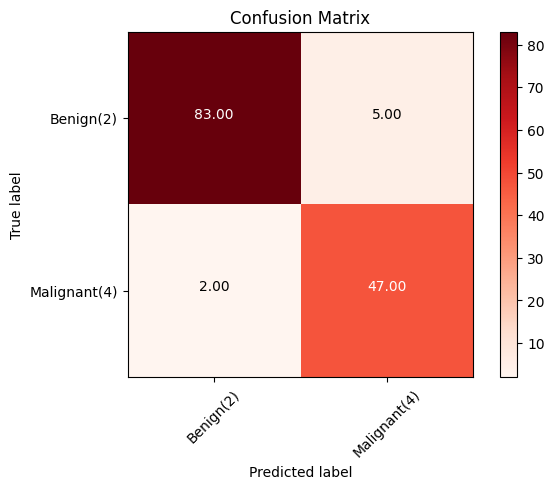

In [ ]:
cf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=[2,4])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cf_matrix, classes=['Benign(2)', 'Malignant(4)'], title='Confusion Matrix')

In [ ]:
print(sklearn.metrics.accuracy_score(y_test, y_pred))

0.948905109489051


In [ ]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.94      0.96        88
           4       0.90      0.96      0.93        49

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



In [ ]:
# model training with linear kernel
model_linear = SVC(kernel="linear")

model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.94      0.95        88
           4       0.90      0.94      0.92        49

    accuracy                           0.94       137
   macro avg       0.93      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137



In [ ]:
# model training with polynomial kernel
model_poly = sklearn.svm.SVC(kernel="poly")

model_poly.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.94      0.95        88
           4       0.90      0.94      0.92        49

    accuracy                           0.94       137
   macro avg       0.93      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137



### CONCLUSION
The model was trained using the SVM algorithm, with the linear, RBF and polynomial kernels
The RBF function kernel yielded the best results with an accuracy of 95%